In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Vinay\Digital Trainee\Python\Practice\Classroom\Dataset\Weather Data.csv")
df.head()

,outlook,Temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [7]:
features = df.iloc[:,:-1]
target= df.iloc[:,-1]

In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [21]:
features_trans = features.apply(LE.fit_transform)
features_trans.head()

,outlook,Temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# The main focus is to understand Decision tree plot, hence didn't used Train-Test Split

In [99]:
model = DecisionTreeClassifier(random_state=1, max_depth=6)
model.fit(features_trans,target)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [100]:
model.score(features_trans,target)*100

100.0

In [101]:
fn = list(features_trans.columns)
cn = df['play'].unique().astype(str).tolist()    # unique values from Targeted column in text form

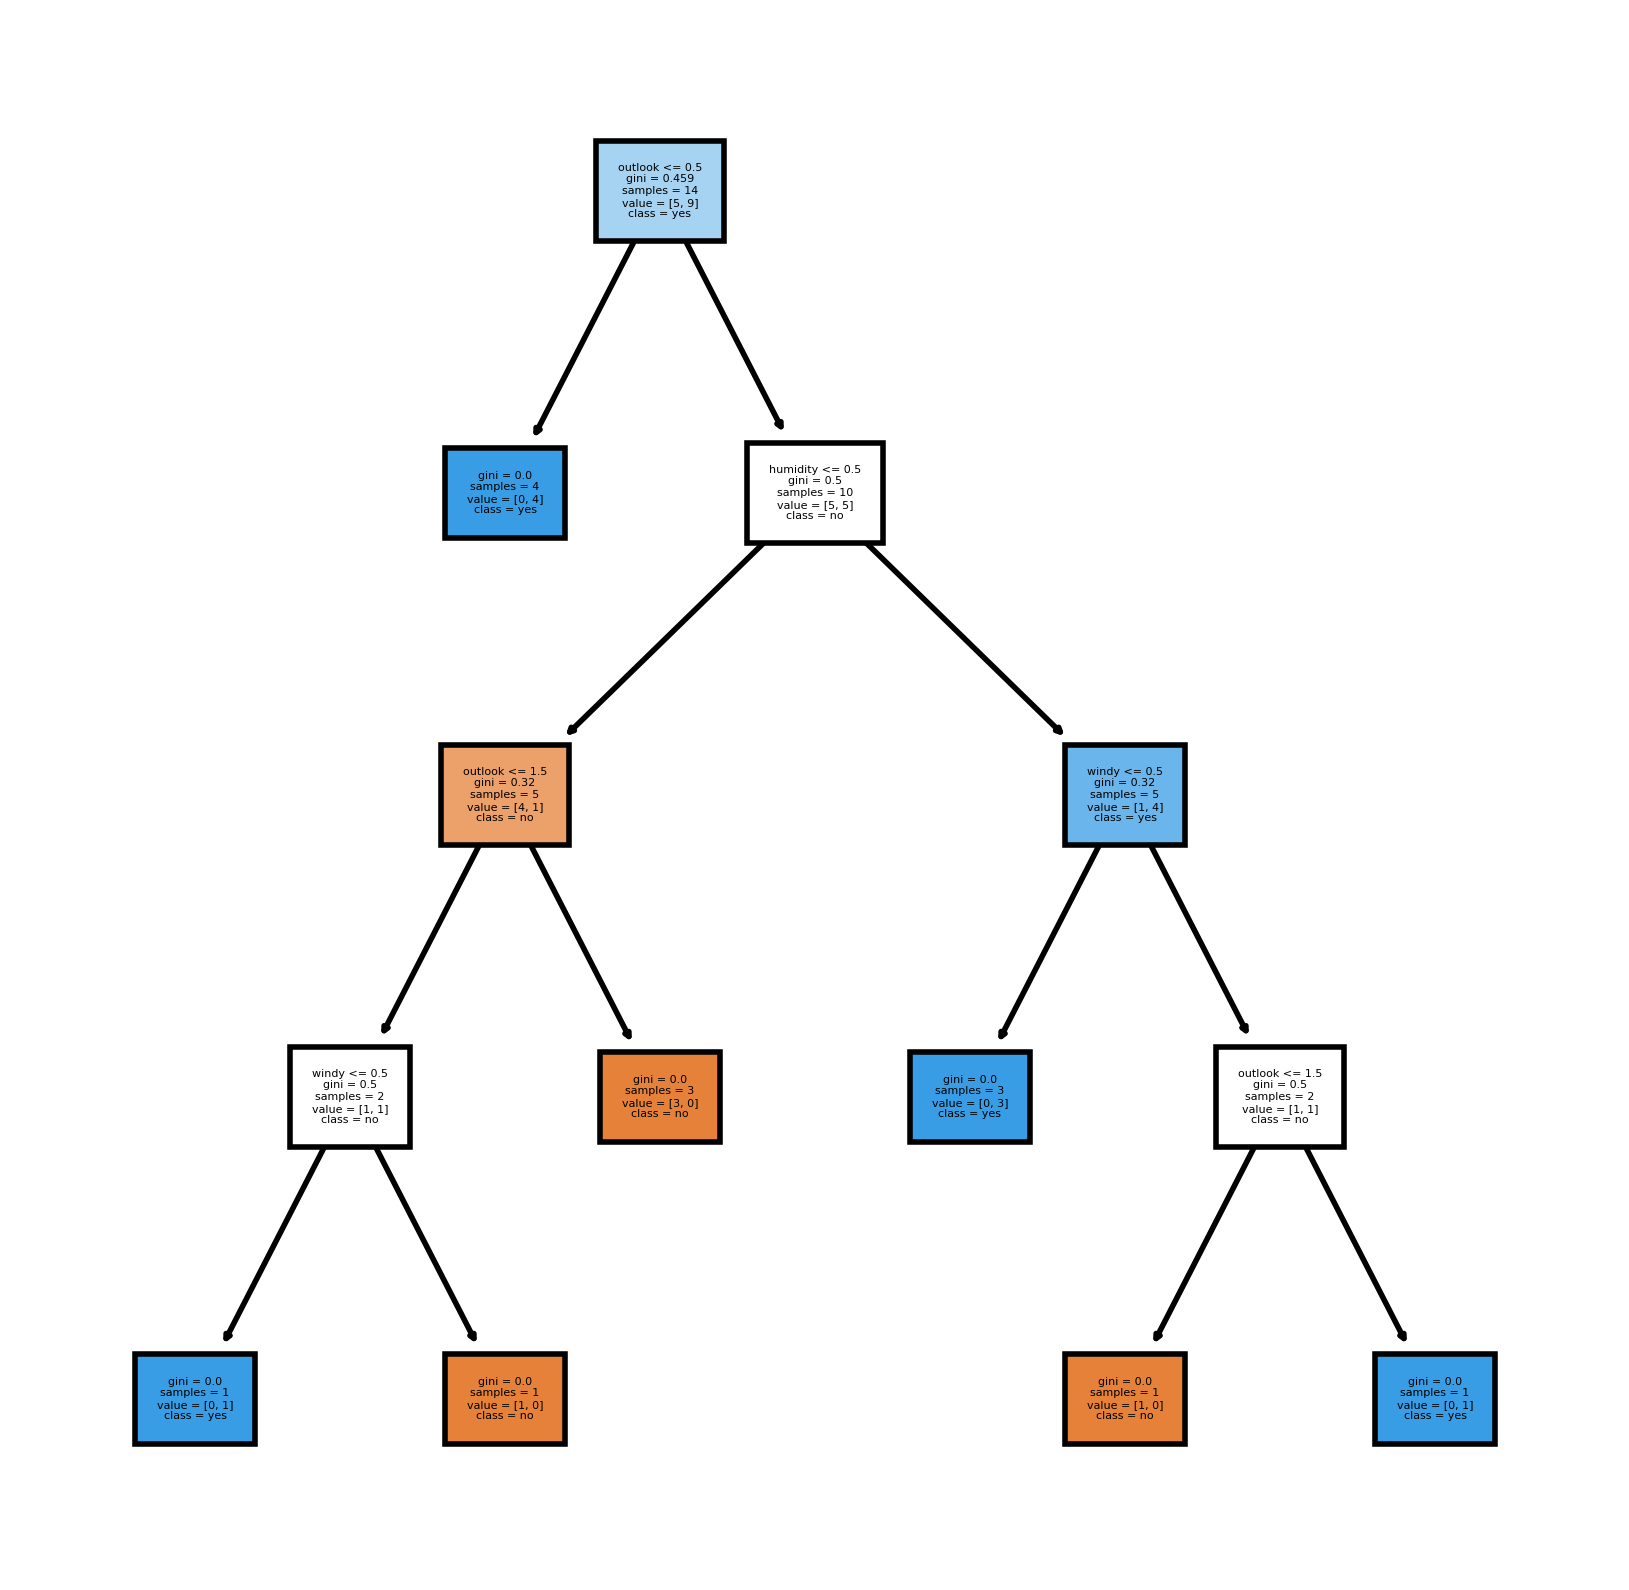

In [102]:
from sklearn import tree

plt.figure(figsize = (5,5), dpi=400)   # dpi >to make image clearer than default

tree.plot_tree(model,
           feature_names = fn, 
           class_names=cn,
           fontsize = 2, 
           filled = True)

In [94]:
print(tree.export_text(model, feature_names = fn ))

|--- outlook <= 0.50
|   |--- class: yes
|--- outlook >  0.50
|   |--- humidity <= 0.50
|   |   |--- outlook <= 1.50
|   |   |   |--- windy <= 0.50
|   |   |   |   |--- class: yes
|   |   |   |--- windy >  0.50
|   |   |   |   |--- class: no
|   |   |--- outlook >  1.50
|   |   |   |--- class: no
|   |--- humidity >  0.50
|   |   |--- windy <= 0.50
|   |   |   |--- class: yes
|   |   |--- windy >  0.50
|   |   |   |--- outlook <= 1.50
|   |   |   |   |--- class: no
|   |   |   |--- outlook >  1.50
|   |   |   |   |--- class: yes



In [110]:
model.tree_.impurity

array([0.45918367, 0.        , 0.5       , 0.32      , 0.5       ,
       0.        , 0.        , 0.        , 0.32      , 0.        ,
       0.5       , 0.        , 0.        ])

# Pruning example

In [141]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [142]:
features = iris.iloc[:,:-1]
target = iris.iloc[:,-1]

In [143]:
from sklearn.model_selection import train_test_split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0)

clf = DecisionTreeClassifier(random_state=10)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [146]:
clf.score(x_test,y_test)

0.9736842105263158

In [148]:
fn = list(features.columns)
cn = iris['species'].unique().astype(str).tolist()

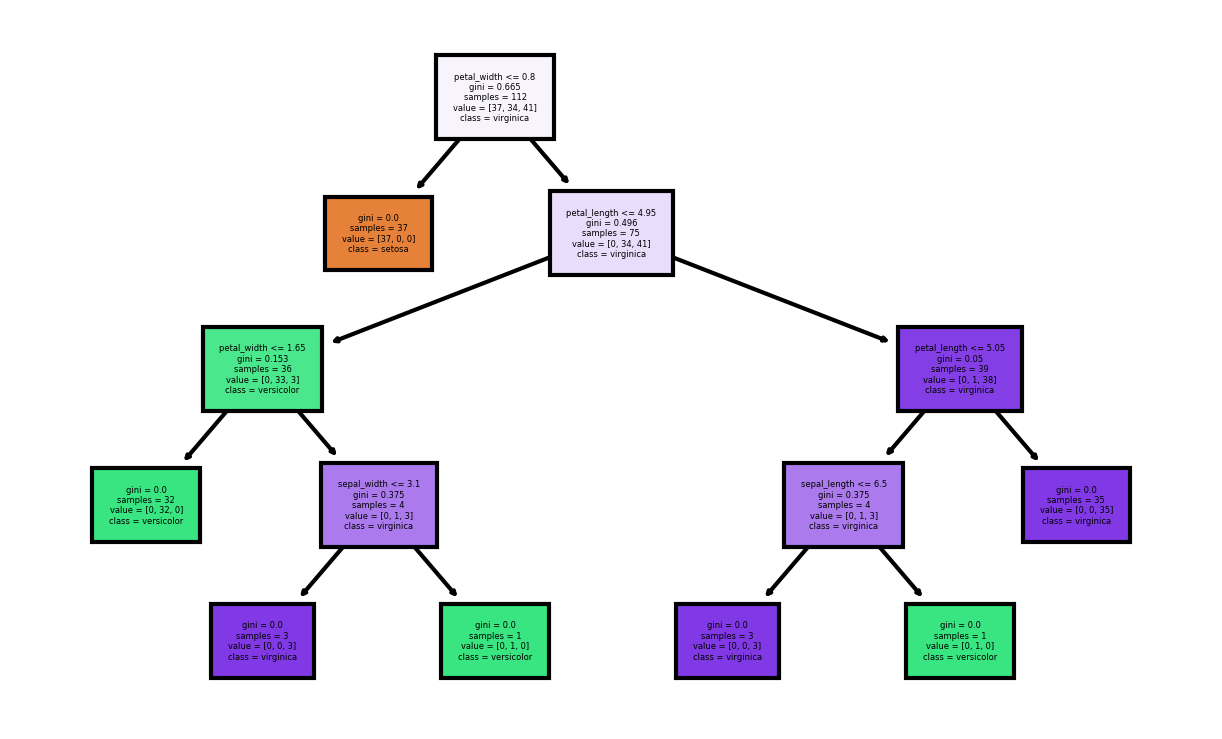

In [151]:
from sklearn import tree

plt.figure(figsize = (5,3), dpi=300)   # dpi >to make image clearer than default

tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           fontsize = 2, 
           filled = True)
plt.show()

In [152]:
print(clf.tree_.max_depth)

4


In [153]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [154]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.332795493197279


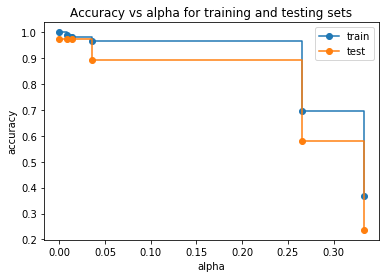

In [155]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [161]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.04)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04, random_state=0)

In [162]:
clf.score(x_test, y_test)

0.8947368421052632

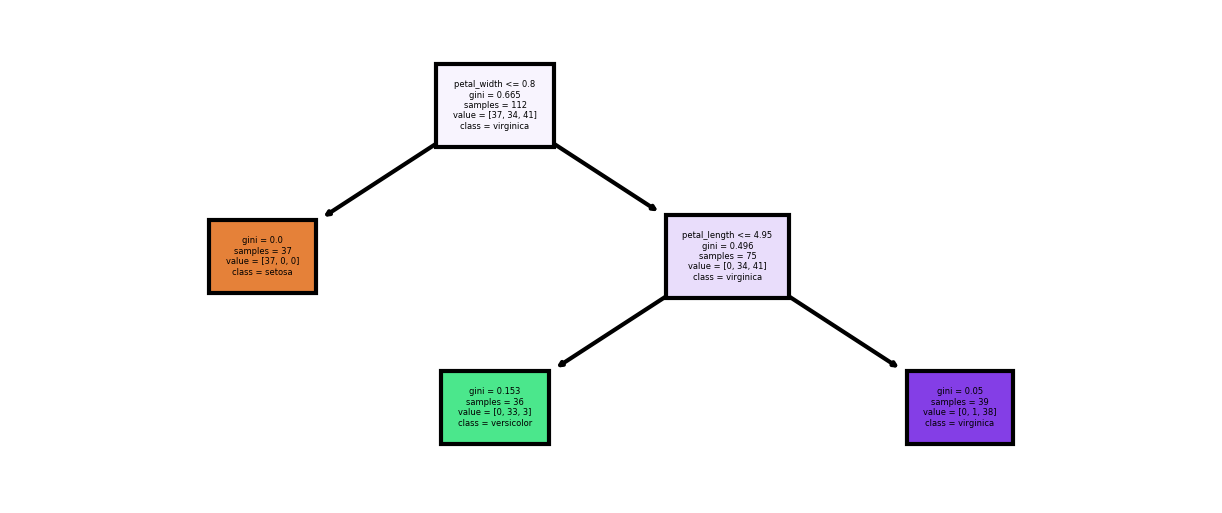

In [163]:
from sklearn import tree

plt.figure(figsize = (5,2), dpi=300)   # dpi >to make image clearer than default

tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           fontsize = 2, 
           filled = True)
plt.show()

In [164]:
print(clf.tree_.max_depth)

2


# Grid Search CV

In [167]:
?DecisionTreeClassifier

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [175]:
dict = {'criterion' : ['gini', 'entropy'],
        'max_depth' : list(range(1,11))}

In [179]:
from sklearn.model_selection import GridSearchCV
Grid = GridSearchCV(clf, param_grid = dict , cv = 10)

In [180]:
Grid.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.04, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [181]:
Grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy', max_depth=3,
                       random_state=0)

In [182]:
Grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}